In [2]:
import torch
import numpy as np

import h5py
import matplotlib.pyplot as plt

In [2]:
def normalized_rmse(predictions, true_values):
  """
  Calculates the Normalized Root Mean Squared Error (nRMSE).

  Args:
    predictions: A array containing the predicted values.
    true_values: A array containing the true values.

  Returns:
    The normalized root mean squared error.
  """
  #print(predictions.shape, true_values.shape)

  rmse = torch.sqrt(torch.mean((predictions - true_values) ** 2, dim = 1 ) )

  nrmse = rmse /   torch.sqrt(torch.mean((true_values) ** 2, dim = 1) )    #torch.std(true_values)
  #return torch.mean(nrmse)
  return nrmse

In [3]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2/run_2_result.pt"
test_cons = torch.load(file_loc, map_location="cpu")
print(test_cons.keys())

dict_keys(['train_cons_oto_250', 'train_cons_ro_250', 'test_cons_oto_250', 'test_cons_ro_250', 'valid_cons_oto_250', 'valid_cons_ro_250', 'train_var_oto_250', 'train_var_ro_250', 'test_var_oto_250', 'test_var_ro_250', 'valid_var_oto_250', 'valid_var_ro_250'])


In [4]:
prediction_B1_cons = test_cons["test_cons_ro_250"][1]
actual_B1_cons = test_cons["test_cons_ro_250"][2]
actual_B1_cons.shape

torch.Size([128, 256, 191])

In [5]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_train_time_100_1/run_2_train_time_100_1_result.pt"
test_cons_t_100 = torch.load(file_loc, map_location="cpu")
print(test_cons_t_100.keys())

dict_keys(['train_cons_oto_250', 'train_cons_ro_250', 'test_cons_oto_250', 'test_cons_ro_250', 'valid_cons_oto_250', 'valid_cons_ro_250', 'train_var_oto_250', 'train_var_ro_250', 'test_var_oto_250', 'test_var_ro_250', 'valid_var_oto_250', 'valid_var_ro_250'])


In [6]:
prediction_B1_cons_t_100 = test_cons_t_100["test_cons_ro_250"][1]
actual_B1_cons_t_100 = test_cons_t_100["test_cons_ro_250"][2]
actual_B1_cons_t_100.shape

torch.Size([128, 256, 191])

In [21]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6/run_6_result_prior_dt1_3_second.pt"
test_var = torch.load(file_loc, map_location="cpu")
print(test_var.keys())

dict_keys(['train_cons_oto_250', 'train_cons_ro_250', 'test_cons_oto_250', 'test_cons_ro_250', 'valid_cons_oto_250', 'valid_cons_ro_250', 'train_var_oto_250', 'train_var_ro_250', 'test_var_oto_250', 'test_var_ro_250', 'valid_var_oto_250', 'valid_var_ro_250'])


In [25]:
prediction_B1_var = test_var["test_var_ro_250"][1]
actual_B1_var = test_var["test_var_ro_250"][2]

In [8]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_train_time_100/run_6_train_time_100_result_prior_dt1_3_second.pt"
test_var_t_100 = torch.load(file_loc, map_location="cpu")
print(test_var_t_100.keys())

dict_keys(['train_cons_oto_250', 'train_cons_ro_250', 'test_cons_oto_250', 'test_cons_ro_250', 'valid_cons_oto_250', 'valid_cons_ro_250', 'train_var_oto_250', 'train_var_ro_250', 'test_var_oto_250', 'test_var_ro_250', 'valid_var_oto_250', 'valid_var_ro_250'])


In [9]:
prediction_B1_var_cons_t_100 = test_var_t_100["test_cons_ro_250"][1]
actual_B1_var_cons_t_100 = test_var_t_100["test_cons_ro_250"][2]

prediction_B1_var_var_t_100 = test_var_t_100["test_var_ro_250"][1]
actual_B1_var_var_t_100 = test_var_t_100["test_var_ro_250"][2]

print(actual_B1_var_cons_t_100.shape)
print(actual_B1_var_var_t_100.shape)

torch.Size([128, 256, 191])
torch.Size([128, 256, 90])


In [26]:
nrmse_cons = normalized_rmse(prediction_B1_cons, actual_B1_cons)
nrmse_cons_t_100 = normalized_rmse(prediction_B1_cons_t_100, actual_B1_cons_t_100)

nrmse_var = normalized_rmse(prediction_B1_var, actual_B1_var)
nrmse_var_cons_t_100 = normalized_rmse(prediction_B1_var_cons_t_100, actual_B1_var_cons_t_100)
nrmse_var_var_t_100 = normalized_rmse(prediction_B1_var_var_t_100, actual_B1_var_var_t_100)

In [11]:
torch.mean(nrmse_cons)

tensor(0.0030)

In [12]:
torch.mean(nrmse_cons_t_100)

tensor(0.0074)

In [13]:
torch.mean(nrmse_var_cons_t_100)

tensor(0.2556)

In [14]:
torch.mean(nrmse_var_var_t_100)

tensor(0.0860)

In [ ]:
torch.arange(10,201), torch.mean(nrmse_cons, dim=0)

In [4]:
tt = torch.cat((torch.arange(10,50,1), torch.arange(54,201,5)))
print(tt.shape)
print(tt)

torch.Size([70])
tensor([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
         24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  54,  59,
         64,  69,  74,  79,  84,  89,  94,  99, 104, 109, 114, 119, 124, 129,
        134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199])


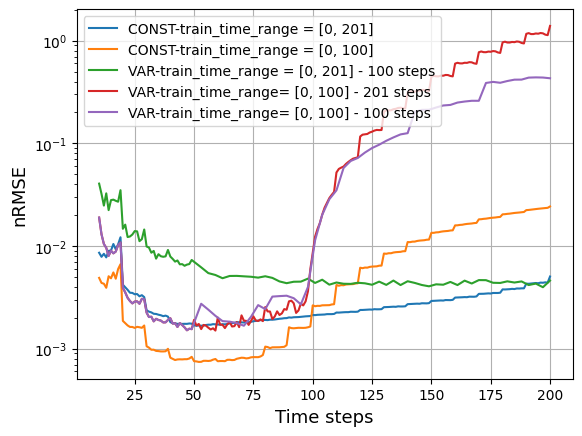

In [29]:
plt.plot(torch.arange(10,201), torch.mean(nrmse_cons, dim=0), label = "CONST-train_time_range = [0, 201]")
plt.plot(torch.arange(10,201), torch.mean(nrmse_cons_t_100, dim=0), label = "CONST-train_time_range = [0, 100]")

plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(nrmse_var, dim=0), label = "VAR-train_time_range = [0, 201] - 100 steps")
plt.plot(torch.arange(10,201), torch.mean(nrmse_var_cons_t_100, dim=0), label = "VAR-train_time_range= [0, 100] - 201 steps")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(nrmse_var_var_t_100, dim=0), label = "VAR-train_time_range= [0, 100] - 100 steps")
plt.legend()
plt.yscale("log")
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

In [ ]:
#file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6/run_6_result_prior_dt1_3.pt"
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6/run_6_result_prior_dt1_3_second.pt"
test_var_prior_1_3 = torch.load(file_loc, map_location="cpu")
print(test_var_prior_1_3.keys())

dict_keys(['train_cons_oto_250', 'train_cons_ro_250', 'test_cons_oto_250', 'test_cons_ro_250', 'valid_cons_oto_250', 'valid_cons_ro_250', 'train_var_oto_250', 'train_var_ro_250', 'test_var_oto_250', 'test_var_ro_250', 'valid_var_oto_250', 'valid_var_ro_250'])


In [6]:
prediction_B1_var_prior_1_3 = test_var_prior_1_3["test_var_ro_250"][1]
actual_B1_var_prior_1_3 = test_var_prior_1_3["test_var_ro_250"][2]

In [7]:
prediction_B1_var_cons_prior_1_3 = test_var_prior_1_3["test_cons_ro_250"][1]
actual_B1_var_cons_prior_1_3 = test_var_prior_1_3["test_cons_ro_250"][2]

In [158]:
prediction_B1_var_cons_prior_1_3.shape

torch.Size([128, 256, 191])

In [136]:
test_var_prior_1_3["test_var_ro_250"][3][0]

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  53,  56,  59,  62,  65,  68,
         71,  74,  77,  80,  83,  86,  89,  92,  95,  98, 101, 104, 107, 110,
        113, 116, 119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149, 152,
        155, 158, 161, 164, 167, 170, 173, 176, 179, 182, 185, 188, 191, 194,
        197, 200])

In [91]:
actual_B1_var_prior_1_3.shape

torch.Size([128, 256, 90])

In [77]:
actual_B1_cons.shape

torch.Size([128, 256, 191])

In [63]:
test_cons["test_cons_ro_250"][-1][0][10:]-10

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

In [62]:
test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  43,  46,
         49,  52,  55,  58,  61,  64,  67,  70,  73,  76,  79,  82,  85,  88,
         91,  94,  97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130,
        133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172,
        175, 178, 181, 184, 187, 190])

In [138]:
array = test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10
array

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  43,  46,
         49,  52,  55,  58,  61,  64,  67,  70,  73,  76,  79,  82,  85,  88,
         91,  94,  97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130,
        133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172,
        175, 178, 181, 184, 187, 190])

In [64]:
prediction_B1_cons.shape

torch.Size([128, 256, 191])

In [19]:
prediction_B1_cons_1 = prediction_B1_cons[...,test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10]
actual_B1_cons_1 = actual_B1_cons[...,test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10 ]

In [20]:
prediction_B1_var_cons_1 = prediction_B1_var_cons_prior_1_3[...,test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10]
actual_B1_var_cons_1 = actual_B1_var_cons_prior_1_3[...,test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10 ]

In [142]:
actual_B1_cons_1.shape

torch.Size([128, 256, 90])

In [21]:
nrmse_cons = normalized_rmse(prediction_B1_cons_1, actual_B1_cons_1 )
nrmse_var = normalized_rmse(prediction_B1_var_prior_1_3, actual_B1_var_prior_1_3)
nrmse_var_cons = normalized_rmse(prediction_B1_var_cons_1, actual_B1_var_cons_1)

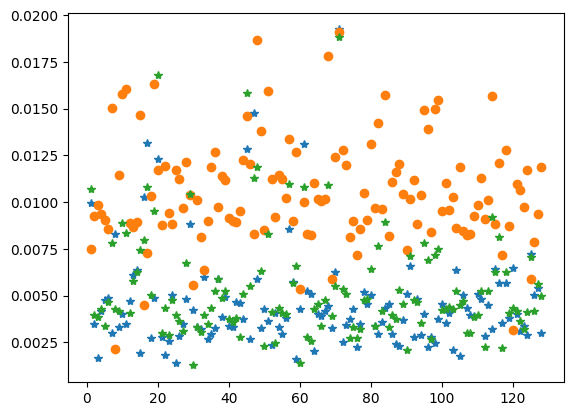

In [23]:
nrmse_var.shape

plt.plot(torch.arange(1,129), nrmse_var[:,-1], "*")
plt.plot(torch.arange(1,129), nrmse_var_cons[:,-1], "o")
plt.plot(torch.arange(1,129), nrmse_var_cons[:,-2], "*")

In [28]:
nrmse_var_cons.shape

torch.Size([128, 90])

In [29]:
prediction_B1_var_cons_1.shape

torch.Size([128, 256, 90])

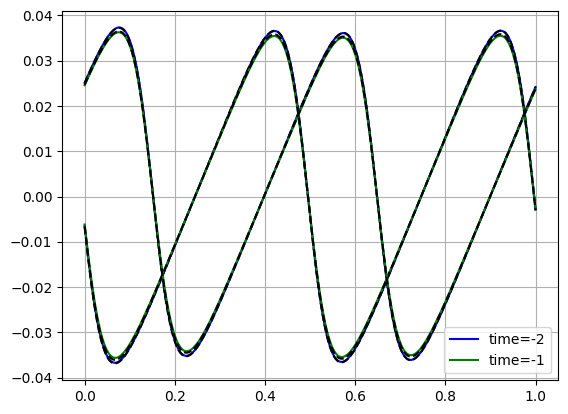

In [42]:
samp = 120
plt.plot(torch.linspace(0,1,256), prediction_B1_var_cons_1[samp,:, -2], "b", label="time=-2")
plt.plot(torch.linspace(0,1,256), actual_B1_var_cons_1[samp,:, -2], "k--")

plt.plot(torch.linspace(0,1,256), prediction_B1_var_cons_1[samp,:, -1], "g", label="time=-1")
plt.plot(torch.linspace(0,1,256), actual_B1_var_cons_1[samp,:, -1], "k--")

samp = 5
plt.plot(torch.linspace(0,1,256), prediction_B1_var_cons_1[samp,:, -2], "b")
plt.plot(torch.linspace(0,1,256), actual_B1_var_cons_1[samp,:, -2], "k--")
plt.plot(torch.linspace(0,1,256), prediction_B1_var_cons_1[samp,:, -1], "g")
plt.plot(torch.linspace(0,1,256), actual_B1_var_cons_1[samp,:, -1], "k--")

plt.legend()
plt.grid()


In [43]:
torch.mean(nrmse_var)

tensor(0.0091)

In [44]:
torch.mean(nrmse_var_cons)

tensor(0.0097)

In [47]:
torch.mean(nrmse_var[:,-1])

tensor(0.0046)

In [48]:
torch.mean(nrmse_cons[:,-1])

tensor(0.0050)

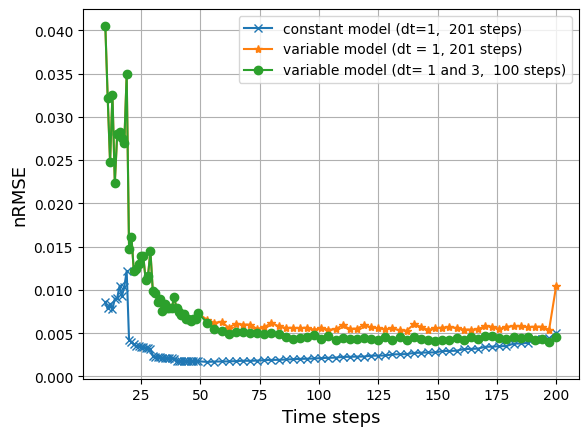

In [26]:
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(nrmse_cons, dim=0), "-x", label = "constant model (dt=1,  201 steps)")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(nrmse_var_cons, dim=0), "-*", label = "variable model (dt = 1, 201 steps)")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(nrmse_var, dim=0), "-o", label = "variable model (dt= 1 and 3,  100 steps)")
#plt.yscale("log")
plt.legend()
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

In [151]:
nrmse_cons.shape

torch.Size([128, 90])

In [152]:
nrmse_var.shape

torch.Size([128, 90])

In [105]:
data[1].shape

torch.Size([128, 256, 201])

In [110]:
actual_B1_var_prior_1_3.shape

torch.Size([128, 256, 90])

In [128]:
actual_B1_var_prior_1_3.shape

torch.Size([128, 256, 90])

In [140]:
torch.cat((torch.arange(10), torch.arange(10,50,1), torch.arange(53,201,3)))[10:]-10

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  43,  46,
         49,  52,  55,  58,  61,  64,  67,  70,  73,  76,  79,  82,  85,  88,
         91,  94,  97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130,
        133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172,
        175, 178, 181, 184, 187, 190])

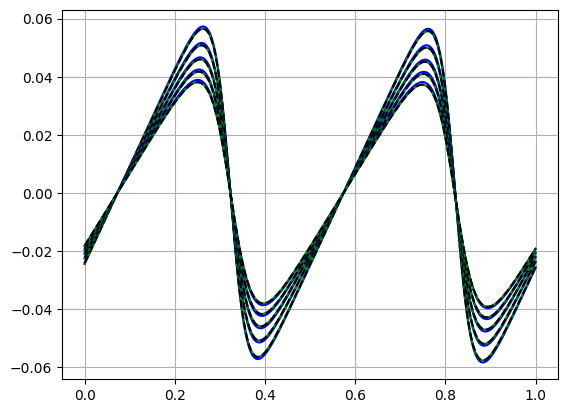

In [149]:
samp = 4
for i in range(70,90,4):
    #i = 10
    #plt.plot( torch.linspace(0,1,256), actual_B1_var_prior_1_3[samp,:,i], "g")
    
    plt.plot( torch.linspace(0,1,256), prediction_B1_cons_1[samp,:,i], "b")
    plt.plot( torch.linspace(0,1,256), prediction_B1_var_prior_1_3[samp,:,i], "g")
    #plt.plot( torch.linspace(0,1,256), data[1][i,:,0+10], "b")
    plt.plot( torch.linspace(0,1,256), actual_B1_cons_1[samp,:,i], "k--")

plt.grid()

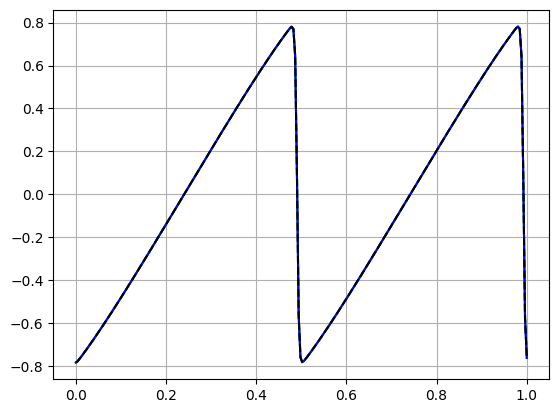

In [137]:
for i in range(0,90,):
    i = 10
    plt.plot( torch.linspace(0,1,256), actual_B1_var_prior_1_3[i,:,0], "g")
    #plt.plot( torch.linspace(0,1,256), data[1][i,:,0+10], "b")
    plt.plot( torch.linspace(0,1,256), actual_B1_cons[i,:,0], "k--")

plt.grid()